In [1]:
# SETTINGS

number_topics = 15

# Filter

Here we assume that the source file already contains the text, as it's a subcorpus.

In [2]:
# Filter the input file
import pandas as pd

df = pd.read_csv('00 source data (urls).csv')
df.fillna('', inplace=True)

# /!\ FILTERING
df = df[df['area'] == 'Nunavut']

df.to_csv("01 data filtered.csv", index = False, encoding='utf-8')

df

,result #,search engine,discourse,area,domain,actor name,article title,article url,article description,total nr of results (best guess),...,canonical_url,title,description,raw_content,comments,author,categories,tags,date,sitename
1136,3014,bing,environment,Nunavut,cer-rec,,"CER – Canada""s Renewable Power – Nunavut",https://www.cer-rec.gc.ca/en/data-analysis/ene...,"Between 2010 and 2017, Nunavut added less than...",2960000,...,,,,,,,,,,
1137,3002,bing,environment,Nunavut,canada,,Nunavut - Canada.ca,https://www.canada.ca/en/canadian-heritage/ser...,The tuktu (caribou) and qilalugaq tugaalik (na...,2960000,...,,Nunavut,"Explore the official symbols of Nunavut, which...","Nunavut's territorial symbols\nThe largest, no...",,Canadian Heritage,,,2017-08-15,Canada.ca
1144,3009,bing,environment,Nunavut,rcinet,,Participants at Nunavut mine hearing question ...,https://www.rcinet.ca/eye-on-the-arctic/2021/0...,1/30/2021 · “IQ (Inuit knowledge) captures kno...,2960000,...,https://www.rcinet.ca/eye-on-the-arctic/2021/0...,Participants at Nunavut mine hearing question ...,Tensions continue between Baffinland and Inuit...,Participants at Nunavut mine hearing question ...,,"Beth Brown, CBC News",Canada,,2021-01-30,Eye on the Arctic
1145,3013,bing,environment,Nunavut,rcinet,,"Inuit in Nunavut, Canada suffer significant in...",https://www.rcinet.ca/eye-on-the-arctic/2020/1...,"The priority areas include power, waste water,...",2960000,...,https://www.rcinet.ca/eye-on-the-arctic/2020/1...,"Inuit in Nunavut, Canada suffer significant in...",The infrastructure gap puts Inuit in Nunavut a...,"Inuit in Nunavut, Canada suffer significant in...",,"Thomas Rohner, CBC News",RCI,,2020-10-22,Eye on the Arctic
1149,3000,bing,environment,Nunavut,gov,,Government of Nunavut,https://www.gov.nu.ca/,The Government of Nunavut. P.O. Box 1000 Stati...,2960000,...,https://www.gov.nu.ca/,Government of Nunavut |,,Find the service or program you are looking fo...,,,,,2021-04-24,gov.nu.ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534,3131,bing,UN SDGs,Nunavut,ucalgary,,Exploring Renewable Energy Opportunties for Nu...,https://prism.ucalgary.ca/bitstream/handle/188...,1 Chapter 1: Introduction 1.1 Overview The Can...,899000,...,,,,,,,,,,
1551,3473,bing,sustainability,Nunavut,justice,,Justices of the Peace - Inuit Women and the Nu...,https://www.justice.gc.ca/eng/rp-pr/aj-ja/rr00...,The Nunavut government is committed to ensurin...,2150000,...,,Inuit Women and the Nunavut Justice System,Reports from Inuit women groups and northern j...,Inuit Women and the Nunavut Justice System\n3....,,"Government of Canada, Department of Justice, R...",,,2015-01-07,Inuit Women and the Nunavut Justice System
1612,3348,bing,green growth,Nunavut,travelnunavut,,Species in Nunavut | Travel Nunavut,https://travelnunavut.ca/things-to-see-do/fish...,Lake trout are distributed widely throughout t...,3920000,...,https://travelnunavut.ca/things-to-see-do/fish...,Species in Nunavut,,We use cookies to improve functionality and pe...,,,,,,Travel Nunavut
1716,3401,bing,sustainability,Nunavut,travelnunavut,,Welcome to Nunavut! | Travel Nunavut,https://travelnunavut.ca/,Travel Nunavut seeks partnerships with governm...,2150000,...,https://travelnunavut.ca/,Welcome to Nunavut!,,We use cookies to improve functionality and pe...,,,,,,Travel Nunavut


# Group content by actor

In [3]:
actor_dict = {}
for index, row in df.iterrows():
    if row['actor name']:
        actor_id = row['actor name']
    else:
        actor_id = row['domain']
    if actor_id in actor_dict:
        actor_obj = actor_dict[actor_id]
    else:
        actor_obj = {}
        actor_obj['Id'] = actor_id
        actor_obj['urls'] = ''
        actor_obj['text'] = ''
        actor_obj['discourse: Climate change'] = 'False'
        actor_obj['discourse: Environment'] = 'False'
        actor_obj['discourse: Green growth'] = 'False'
        actor_obj['discourse: Sustainability'] = 'False'
        actor_obj['discourse: UN SDGs'] = 'False'
        actor_obj['area: Arctic'] = 'False'
        actor_obj['area: Arctic Norway'] = 'False'
        actor_obj['area: Extended Arctic'] = 'False'
        actor_obj['area: Faroed Islands'] = 'False'
        actor_obj['area: Greenland'] = 'False'
        actor_obj['area: Iceland'] = 'False'
        actor_obj['area: Nunavut'] = 'False'
        actor_obj['area: Sami'] = 'False'
    
    actor_obj['urls'] = actor_obj['urls'] + str(row['article url']) + ' '
    actor_obj['text'] = actor_obj['text'] + str(row['raw_content']) + ' . '

    if row['discourse'] == 'Climate change':
        actor_obj['discourse: Climate change'] = 'True'
    if row['discourse'] == 'environment':
        actor_obj['discourse: Environment'] = 'True'
    if row['discourse'] == 'green growth':
        actor_obj['discourse: Green growth'] = 'True'
    if row['discourse'] == 'sustainability':
        actor_obj['discourse: Sustainability'] = 'True'
    if row['discourse'] == 'UN SDGs':
        actor_obj['discourse: UN SDGs'] = 'True'
    if row['area'] == 'arctic':
        actor_obj['area: Arctic'] = 'True'
    if row['area'] == 'arctic norway':
        actor_obj['area: Arctic Norway'] = 'True'
    if row['area'] == 'extended arctic':
        actor_obj['area: Extended Arctic'] = 'True'
    if row['area'] == 'faroe islands':
        actor_obj['area: Faroed Islands'] = 'True'
    if row['area'] == 'greenland':
        actor_obj['area: Greenland'] = 'True'
    if row['area'] == 'Iceland':
        actor_obj['area: Iceland'] = 'True'
    if row['area'] == 'Nunavut':
        actor_obj['area: Nunavut'] = 'True'
    if row['area'] == 'Sami':
        actor_obj['area: Sami'] = 'True'
    
    actor_dict[actor_id] = actor_obj
print("Actor index built.")

Actor index built.


In [4]:
# DOWNLOAD ACTORS
actors_df = pd.DataFrame.from_dict(actor_dict, orient='index')
actors_df.to_csv("02 Actors with text.csv", index = False, encoding='utf-8')
actors_df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,area: Extended Arctic,area: Faroed Islands,area: Greenland,area: Iceland,area: Nunavut,area: Sami
cer-rec,cer-rec,https://www.cer-rec.gc.ca/en/data-analysis/ene...,. .,True,True,False,False,False,False,False,False,False,False,False,True,False
canada,canada,https://www.canada.ca/en/canadian-heritage/ser...,"Nunavut's territorial symbols\nThe largest, no...",True,True,True,True,True,False,False,False,False,False,False,True,False
rcinet,rcinet,https://www.rcinet.ca/eye-on-the-arctic/2021/0...,Participants at Nunavut mine hearing question ...,True,True,False,True,True,False,False,False,False,False,False,True,False
gov,gov,https://www.gov.nu.ca/ https://gov.nu.ca/envir...,Find the service or program you are looking fo...,True,True,True,True,False,False,False,False,False,False,False,True,False
worldatlas,worldatlas,https://www.worldatlas.com/articles/what-is-th...,5. Description\nNunavut is the newest territor...,False,True,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tbs-sct,tbs-sct,https://www.tbs-sct.gc.ca/pol/doc-eng.aspx?id=...,The following definitions apply to this direct...,False,False,False,True,False,False,False,False,False,False,False,True,False
worldwidetrophyadventures,worldwidetrophyadventures,https://worldwidetrophyadventures.com/trips/nu...,March 1 to May 31 is the date range that Sprin...,False,False,False,True,False,False,False,False,False,False,False,True,False
crrf,crrf,http://sorc.crrf.ca/nunavut/,Chris Southcott\nNunavut is the youngest terri...,False,False,True,False,False,False,False,False,False,False,False,True,False
ucalgary,ucalgary,http://pubs.aina.ucalgary.ca/arctic/Arctic57-1...,. .,False,True,False,False,True,False,False,False,False,False,False,True,False


# LDA: extract topics

In [5]:
import pandas as pd
# This is for text mining
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [6]:
# Source file (CSV)
source_file = "02 Actors with text.csv"
text_col_name = "text"

# More features is more dimensions for each document. You should probably keep it at 1000.
no_features = 1000

In [7]:
# LOAD DATA
documents_dictionary = {}
df = pd.read_csv(source_file)

for index, row in df.iterrows():
    key = row['Id']
    text = str(row[text_col_name])
    if len(text)>10:
        documents_dictionary[key] = text

In [8]:
# COMPUTE LDA TOPICS
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents_dictionary.values())
tf_feature_names = tf_vectorizer.get_feature_names()
lda = LatentDirichletAllocation(n_components=number_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
print("LDA topics computed.")

LDA topics computed.


In [9]:
# DISPLAY RESULTS (for monitoring)
no_top_words = 25 # How many words to keep for each topic (there may be many)

# Create a data frame for convenience (for download, actually)
topics_df = pd.DataFrame(columns=['topic','word','weight'])

# Display topics to check it works. For each topic, we only display the top words.
i = 0
for topic_idx, topic in enumerate(lda.components_):
    print("# TOPIC_%d:" % (topic_idx))
    for j in topic.argsort()[:-no_top_words - 1:-1]:
        print(str(topic[j]) + "   " + tf_feature_names[j])
        topics_df.loc[i] = ["TOPIC_"+str(topic_idx), tf_feature_names[j], topic[j]]
        i = i+1
    print(" ")

topics_df

# TOPIC_0:
8.444309938361318   nunavut
7.354698627661676   inuit
5.154113775195358   arctic
5.1537082409247725   government
5.048836561675883   canada
4.432546491435214   project
3.6727323936040013   agreement
3.670110991971362   development
3.3120947027029066   marginal
3.2654199757753455   people
3.225400465528502   site
3.223125766586105   work
3.1249656861855044   communities
3.109598646943801   land
3.0502761520522457   federal
3.0207031328696963   new
3.0037433240627753   community
2.971732409332032   note
2.83736523652858   said
2.7867287660016418   referred
2.7471642434034362   subsection
2.6911871012756823   years
2.6365660462403926   act
2.6086658319063516   area
2.5807655075097   section
 
# TOPIC_1:
6.124037029834473   marginal
6.123798886086155   project
5.558869933687322   inuit
5.46724501613646   subsection
4.667975834906574   note
4.357134000137553   nunavut
3.816639312862815   respect
3.815858005612961   minister
3.7503490664085852   government
3.7105076637877126   pub

77.89063691760632   corporation
66.32651134056862   energy
64.0244332720467   reclamation
61.197096550027176   arctic
57.780570077343334   devolution
53.40970913004004   date
51.121733449639976   federal
50.62060318275584   including
50.61050012416797   provide
49.58537203295052   transfer
47.95167577954626   security
47.1013507483903   policy
46.7620606186759   11
45.15441591002738   audit
 
# TOPIC_12:
10.351692976314746   nunavut
4.455927969079066   energy
3.7503576259500027   canada
3.6921075739345004   inuit
3.5543758737278526   community
3.4174236404529488   project
3.049218354078612   government
2.9895813351798353   development
2.978740128256494   section
2.8445908837984066   note
2.8194466869129875   indigenous
2.8027003787701257   arctic
2.789098670472129   solar
2.6423935681035307   program
2.5610710759255273   federal
2.540541761735701   power
2.473926831114598   board
2.454416017136126   bears
2.4383071122948468   work
2.428512443554732   respect
2.37678410698226   agreemen

,topic,word,weight
0,TOPIC_0,nunavut,8.444310
1,TOPIC_0,inuit,7.354699
2,TOPIC_0,arctic,5.154114
3,TOPIC_0,government,5.153708
4,TOPIC_0,canada,5.048837
...,...,...,...
370,TOPIC_14,ice,4.049726
371,TOPIC_14,rates,3.925940
372,TOPIC_14,island,3.915504
373,TOPIC_14,said,3.830882


In [10]:
# COMPUTE DOC x TOPIC RELATIONS (network)
# We create a data frame to store the content. It looks like a matrix.
df_matrix_style = pd.DataFrame(columns=['doc']+[("TOPIC_"+str(i)) for i in range(0,number_topics)])

# We create a second data frame with the same data. It looks like a list.
# Depending on what you want to do, one or the other are most convenient.
df_list_style = pd.DataFrame(columns=['doc', 'topic', 'weight'])

doc_topic = lda.transform(tf)
docs = list(documents_dictionary.keys())
topic_index = {}
i1 = 0
i2 = 0
for j in range(len(docs)):
    key = docs[j]
    topic_weights = list(doc_topic[j])
    
    # Index
    topic_index[key] = topic_weights
    
    # Matrix style
    df_matrix_style.loc[i1] = [key]+topic_weights
    i1 = i1+1
    
    # List style
    for k, w in enumerate(topic_weights):
        df_list_style.loc[i2] = [key, "TOPIC_"+str(k), w]
        i2 = i2+1

print("Done.")

Done.


In [11]:
# Output articles & topics, matrix style, to check that it works:
df_matrix_style

,doc,TOPIC_0,TOPIC_1,TOPIC_2,TOPIC_3,TOPIC_4,TOPIC_5,TOPIC_6,TOPIC_7,TOPIC_8,TOPIC_9,TOPIC_10,TOPIC_11,TOPIC_12,TOPIC_13,TOPIC_14
0,canada,0.000026,0.000026,0.000026,0.000026,0.000026,0.570881,0.000026,0.000026,0.000026,0.000026,0.229568,0.199235,0.000026,0.000026,0.000026
1,rcinet,0.000032,0.000032,0.000032,0.000032,0.000032,0.999555,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
2,gov,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.000016,0.999775,0.000016,0.000016,0.000016,0.000016
3,worldatlas,0.000388,0.000388,0.000388,0.000388,0.000388,0.994574,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388
4,ejatlas,0.000253,0.000253,0.000253,0.333860,0.000253,0.458604,0.000253,0.000253,0.000253,0.204495,0.000253,0.000253,0.000253,0.000253,0.000253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,powertecsolar,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.000093,0.998698,0.000093,0.000093,0.000093,0.000093
123,tbs-sct,0.000855,0.000855,0.000855,0.000855,0.000855,0.000855,0.000855,0.695864,0.000855,0.000855,0.000855,0.293024,0.000855,0.000855,0.000855
124,worldwidetrophyadventures,0.000260,0.000260,0.000260,0.000260,0.165279,0.777371,0.000260,0.054225,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260
125,crrf,0.000082,0.000082,0.000082,0.000082,0.000082,0.998849,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082


In [12]:
# Output articles & topics, list style, to check that it works:
df_list_style

,doc,topic,weight
0,canada,TOPIC_0,0.000026
1,canada,TOPIC_1,0.000026
2,canada,TOPIC_2,0.000026
3,canada,TOPIC_3,0.000026
4,canada,TOPIC_4,0.000026
...,...,...,...
1900,travelnunavut,TOPIC_10,0.002299
1901,travelnunavut,TOPIC_11,0.632383
1902,travelnunavut,TOPIC_12,0.002299
1903,travelnunavut,TOPIC_13,0.002299


In [13]:
# DOWNLOAD LDA results
# Note: these files can be used in Tableau or Table2Net to build various visualizations.

topics_df.to_csv("03-a LDA topics and their words.csv", index = False, encoding='utf-8')
# df_matrix_style.to_csv("03-? LDA actors and topics matrix.csv", index = False, encoding='utf-8')
df_list_style.to_csv("03-b LDA actors and topics list style.csv", index = False, encoding='utf-8')

In [14]:
# ENRICH FILE (and monitor new version)
for topic_id, topic in enumerate(lda.components_):
    colname = "topic_"+str(topic_id)
    values = []
    for index, row in df.iterrows():
        key = row['Id']
        if key in topic_index:
            val = topic_index[key][topic_id]
        else:
            val = 0
        values.append(val)
    df.insert(len(df.columns), colname, values)
df

,Id,urls,text,discourse: Climate change,discourse: Environment,discourse: Green growth,discourse: Sustainability,discourse: UN SDGs,area: Arctic,area: Arctic Norway,...,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,topic_11,topic_12,topic_13,topic_14
0,cer-rec,https://www.cer-rec.gc.ca/en/data-analysis/ene...,. .,True,True,False,False,False,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,canada,https://www.canada.ca/en/canadian-heritage/ser...,"Nunavut's territorial symbols\nThe largest, no...",True,True,True,True,True,False,False,...,0.570881,0.000026,0.000026,0.000026,0.000026,0.229568,0.199235,0.000026,0.000026,0.000026
2,rcinet,https://www.rcinet.ca/eye-on-the-arctic/2021/0...,Participants at Nunavut mine hearing question ...,True,True,False,True,True,False,False,...,0.999555,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032,0.000032
3,gov,https://www.gov.nu.ca/ https://gov.nu.ca/envir...,Find the service or program you are looking fo...,True,True,True,True,False,False,False,...,0.000016,0.000016,0.000016,0.000016,0.000016,0.999775,0.000016,0.000016,0.000016,0.000016
4,worldatlas,https://www.worldatlas.com/articles/what-is-th...,5. Description\nNunavut is the newest territor...,False,True,False,False,False,False,False,...,0.994574,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388,0.000388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,tbs-sct,https://www.tbs-sct.gc.ca/pol/doc-eng.aspx?id=...,The following definitions apply to this direct...,False,False,False,True,False,False,False,...,0.000855,0.000855,0.695864,0.000855,0.000855,0.000855,0.293024,0.000855,0.000855,0.000855
138,worldwidetrophyadventures,https://worldwidetrophyadventures.com/trips/nu...,March 1 to May 31 is the date range that Sprin...,False,False,False,True,False,False,False,...,0.777371,0.000260,0.054225,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260,0.000260
139,crrf,http://sorc.crrf.ca/nunavut/,Chris Southcott\nNunavut is the youngest terri...,False,False,True,False,False,False,False,...,0.998849,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082,0.000082
140,ucalgary,http://pubs.aina.ucalgary.ca/arctic/Arctic57-1...,. .,False,True,False,False,True,False,False,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [15]:
# DOWNLOAD ENRICHED FILE
df.drop(columns=[text_col_name]).to_csv("04 Actors and their topics.csv", index=False)

# Export LDA networks

In [16]:
# Export network of words and topics
import networkx as nx
G = nx.Graph()
for index, row in topics_df.iterrows():
    topic = 'T_'+str(row['topic'])
    word = 'W_'+str(row['word'])
    w = row['weight']
    
    G.add_edge(topic, word)
    G[topic][word]['weight'] = w
    
    G.nodes[topic]['label'] = str(row['topic'])
    G.nodes[topic]['type'] = 'topic'
    G.nodes[word]['label'] = str(row['word'])
    G.nodes[word]['type'] = 'word'
    
nx.write_gexf(G, "05 Words and topics.gexf")

In [17]:
# Export network of actors and topics
import networkx as nx
threshold = 0.001
G = nx.Graph()
for index, row in df_list_style.iterrows():
    topic = 'T_'+str(row['topic'])
    actor = 'A_'+str(row['doc'])
    w = row['weight']
    
    if w > threshold:
        G.add_edge(topic, actor)
        G[topic][actor]['weight'] = w

        G.nodes[topic]['label'] = str(row['topic'])
        G.nodes[topic]['type'] = 'topic'
        G.nodes[actor]['label'] = str(row['doc'])
        G.nodes[actor]['type'] = 'actor'
    
nx.write_gexf(G, "06 Actors and topics.gexf")

# UMAP after the topics

In [18]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import umap

In [19]:
# Load data
df = pd.read_csv("04 Actors and their topics.csv")
df = df.dropna()

In [20]:
# Prepare data
reducer = umap.UMAP()
umap_data = df[
    [
        "topic_0",
        "topic_1",
        "topic_2",
        "topic_3",
        "topic_4",
        "topic_5",
        "topic_6",
        "topic_7",
        "topic_8",
        "topic_9",
        "topic_10",
        "topic_11",
        "topic_12",
        "topic_13",
        "topic_14"
    ]
].values
scaled_umap_data = StandardScaler().fit_transform(umap_data)

In [21]:
# Compute embedding
embedding = reducer.fit_transform(scaled_umap_data)
embedding.shape

(142, 2)

Text(0.5, 1.0, 'UMAP projection of the dataset')

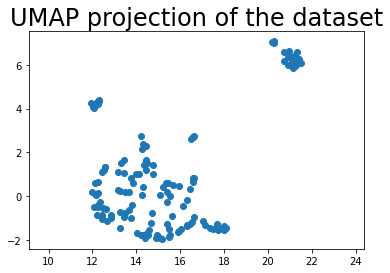

In [22]:
# Monitor embedding
plt.scatter(
    embedding[:, 0],
    embedding[:, 1]
)
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the dataset', fontsize=24)

In [23]:
# Enrich source and download
xvalues = []
yvalues = []
for index, row in df.iterrows():
    coord = embedding[index]
    xvalues.append(coord[0])
    yvalues.append(coord[1])
df.insert(len(df.columns), 'X-UMAP', xvalues)
df.insert(len(df.columns), 'Y-UMAP', yvalues)

df.to_csv("07 Actors with topics + UMAP layout.csv", index = False, encoding='utf-8')